In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


✅ Corrupt images removed
✅ Train/Test folders created
✅ ZIP files extracted
✅ catvsdog: 20000 train | 5000 test
✅ cat: 20000 train | 5000 test
✅ multi: 20943 train | 5236 test
✅ trafic: 41505 train | 10377 test
Found 102722 files belonging to 4 classes.
Found 92049 files belonging to 4 classes.
Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.
Found 102722 files belonging to 4 classes.
Found 92049 files belonging to 4 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 94, 94, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 47, 47, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,292 (6.61 MB)

 Trainable params: 1,732,292 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 1279s 199ms/step - accuracy: 0.8003 - loss: 0.4181 - val_accuracy: 0.8090 - val_loss: 0.3750
Epoch 2/5
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 1259s 196ms/step - accuracy: 0.8225 - loss: 0.3535 - val_accuracy: 0.8170 - val_loss: 0.3567
Epoch 3/5
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 1153s 180ms/step - accuracy: 0.8341 - loss: 0.3247 - val_accuracy: 0.8245 - val_loss: 0.3306
Epoch 4/5
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 1180s 184ms/step - accuracy: 0.8504 - loss: 0.2930 - val_accuracy: 0.8277 - val_loss: 0.3341
Epoch 5/5
6413/6413 ━━━━━━━━━━━━━━━━━━━━ 1216s 190ms/step - accuracy: 0.8664 - loss: 0.2666 - val_accuracy: 0.8303 - val_loss: 0.3575


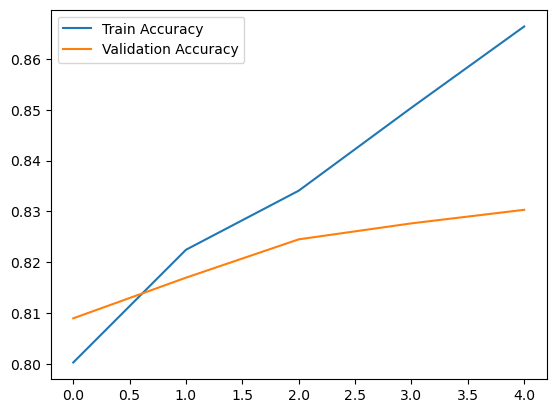

✅ Model saved as 4_class_image_classifier.h5


In [2]:
# =====================================================
# 4-CLASS IMAGE CLASSIFICATION FROM 4 SEPARATE ZIP FILES
# =====================================================

# 1️⃣ Install required libraries
#!pip install tensorflow matplotlib numpy pillow

# 2️⃣ Import libraries
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3️⃣ Define paths
photo_folder = "photo"     # folder where zip files exist
dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# 4️⃣ ZIP files and class names (VERY IMPORTANT)
zip_classes = {
    "catvsdog": "catvsdog.zip",
    "cat": "cat.zip",
    "multi": "multi.zip",
    "trafic": "trafic.zip"
}

from PIL import Image
import os

def strict_clean(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            path = os.path.join(root, file)
            try:
                with Image.open(path) as img:
                    img.load()   # force full load
            except:
                os.remove(path)

strict_clean("dataset/train")
strict_clean("dataset/test")

print("✅ Corrupt images removed")

# 5️⃣ Create train/test folders
for cls in zip_classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

print("✅ Train/Test folders created")

# 6️⃣ Extract ZIP files
for cls, zip_name in zip_classes.items():
    zip_path = os.path.join(photo_folder, zip_name)
    extract_path = f"temp_{cls}"

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("✅ ZIP files extracted")


# 7️⃣ Move images → Train (80%) and Test (20%)
for cls in zip_classes:
    image_files = []

    for root, _, files in os.walk(f"temp_{cls}"):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    random.shuffle(image_files)
    split = int(0.8 * len(image_files))

    train_images = image_files[:split]
    test_images = image_files[split:]

    for img in train_images:
        shutil.copy(img, os.path.join(train_dir, cls))

    for img in test_images:
        shutil.copy(img, os.path.join(test_dir, cls))

    print(f"✅ {cls}: {len(train_images)} train | {len(test_images)} test")
 # 8️⃣ Image preprocessing
import tensorflow as tf

IMG_SIZE = (96, 96)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# Normalize images
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# 🚨 THIS PREVENTS CRASHES FROM BAD IMAGES
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
test_ds = test_ds.apply(tf.data.experimental.ignore_errors())
#data loader
import tensorflow as tf

IMG_SIZE = (96, 96)
BATCH_SIZE = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

# Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=1
)

test_ds = test_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=1
)

# 🚨 CRITICAL FIX (SKIP BAD IMAGES SAFELY)
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
test_ds = test_ds.apply(tf.data.experimental.ignore_errors())

# Improve stability
train_ds = train_ds.prefetch(1)
test_ds = test_ds.prefetch(1)

# 9️⃣ Build CNN Model (4 classes)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(96, 96, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(4, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


# 🔟 Train the model
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=test_ds
)

# 1️⃣1️⃣ Plot accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

# 1️⃣2️⃣ Save model
model.save("4_class_image_cliassifier.h5")
print("✅ Model saved as 4_class_image_classifier.h5")


In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model("4_class_image_classifier.h5")

img = image.load_img("sample.jpg", target_size=(96,96))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_names = ["catvsdog", "cat", "multi", "trafic"]

print("Prediction:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step
Prediction: trafic


## =====================================================
# 4-CLASS IMAGE CLASSIFICATION (ZIP FILES → CNN MODEL)
# =====================================================

# 1️⃣ Import Libraries
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2️⃣ Paths
photo_folder = "photo"
dataset_dir = "dataset"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# 3️⃣ ZIP files (each ZIP = one class)
zip_classes = {
    "catvsdog": "catvsdog.zip",
    "cat": "cat.zip",
    "multi": "multi.zip",
    "trafic": "trafic.zip"
}

# 4️⃣ Create train/test folders
for cls in zip_classes:
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

print("✅ Train/Test folders created")

# 5️⃣ Extract ZIP files
for cls, zip_name in zip_classes.items():
    with zipfile.ZipFile(os.path.join(photo_folder, zip_name), 'r') as zip_ref:
        zip_ref.extractall(f"temp_{cls}")

print("✅ ZIP files extracted")

# 6️⃣ Split images into Train (80%) and Test (20%)
for cls in zip_classes:
    images = []

    for root, _, files in os.walk(f"temp_{cls}"):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                images.append(os.path.join(root, file))

    random.shuffle(images)
    split = int(0.8 * len(images))

    for img in images[:split]:
        shutil.copy(img, os.path.join(train_dir, cls))

    for img in images[split:]:
        shutil.copy(img, os.path.join(test_dir, cls))

    print(f"✅ {cls}: {split} train | {len(images)-split} test")

# 7️⃣ Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="categorical"
)

# 8️⃣ CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dense(4, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# 9️⃣ Train Model
history = model.fit(
    train_set,
    epochs=5,
    steps_per_epoch=100,
    validation_data=test_set,
    validation_steps=50
)

# 🔟 Accuracy Graph
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

# 1️⃣1️⃣ Save Model
model.save("4_class_image_classifier.h5")
print("✅ Model saved successfully!")
